In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = r'D:\Code\Bao_cao_PT_TQH_DATA\data\Balance_AAPl.xlsx'
df = pd.read_excel(file_path, sheet_name='Sheet1', header=3)

#Làm sạch dữ liệu
df_cleaned = df.dropna(how='all', axis=1)
df_cleaned = df_cleaned.dropna(how='all')

#Đặt tên cột bằng hàng đầu tiên và bỏ hàng đầu tiên
df_cleaned.columns = ['Balance Item'] + df_cleaned.iloc[0, 1:].tolist()
df_cleaned = df_cleaned.drop(0)

#Thay thế giá trị 0 bằng NaN để dễ phân tích hơn
df_cleaned.replace(0, pd.NA, inplace=True)

#Chuyển đổi các cột tài chính thành số, đảm bảo rằng chúng ta không chuyển đổi tên mục
for col in df_cleaned.columns[1:]:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

#Đặt 'Balance Item' làm chỉ mục (index)
df_cleaned.set_index('Balance Item', inplace=True)

#Chuyển đổi dữ liệu thành số nguyên (làm tròn)
df_cleaned_int = df_cleaned.copy()
df_cleaned_int = df_cleaned_int.applymap(lambda x: int(x) if pd.notnull(x) else x)

C:\Users\vovan\AppData\Local\Temp\ipykernel_24108\43750620.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cleaned_int = df_cleaned_int.applymap(lambda x: int(x) if pd.notnull(x) else x)


In [3]:
missing_values = df_cleaned_int.isnull().sum()
print("tổng giá trị bị thiếu của mỗi cột: ")
print(missing_values)


tổng giá trị bị thiếu của mỗi cột: 
2023-09-30 00:00:00     8
2022-09-24 00:00:00     8
2021-09-25 00:00:00    10
2020-09-26 00:00:00    10
2019-09-28 00:00:00    10
2018-09-29 00:00:00     8
2017-09-30 00:00:00     5
2016-09-24 00:00:00     6
2015-09-26 00:00:00     6
2014-09-27 00:00:00     4
2013-09-28 00:00:00     5
2012-09-29 00:00:00     7
2011-09-24 00:00:00     7
2010-09-25 00:00:00     7
2009-09-26 00:00:00     6
2008-09-27 00:00:00     6
2007-09-29 00:00:00     7
2006-09-30 00:00:00     8
2005-09-24 00:00:00     8
dtype: int64


In [4]:
df_cleaned_int.fillna(df_cleaned_int.mean(), inplace=True)


In [5]:
df_cleaned_int.isnull().values.any()

np.False_

In [6]:
df_cleaned_int.head()

,2023-09-30 00:00:00,2022-09-24 00:00:00,2021-09-25 00:00:00,2020-09-26 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,2017-09-30 00:00:00,2016-09-24 00:00:00,2015-09-26 00:00:00,2014-09-27 00:00:00,2013-09-28 00:00:00,2012-09-29 00:00:00,2011-09-24 00:00:00,2010-09-25 00:00:00,2009-09-26 00:00:00,2008-09-27 00:00:00,2007-09-29 00:00:00,2006-09-30 00:00:00,2005-09-24 00:00:00
Balance Item,,,,,,,,,,,,,,,,,,,
Cash And Cash Equivalents,2.996500e+10,2.364600e+10,3.494000e+10,3.801600e+10,4.884400e+10,2.591300e+10,2.028900e+10,2.048400e+10,2.112000e+10,1.384400e+10,1.425900e+10,1.074600e+10,9.815000e+09,1.126100e+10,5.263000e+09,1.187500e+10,9.352000e+09,6.392000e+09,3.491000e+09
Short Term Investments,3.159000e+10,2.465800e+10,2.769900e+10,5.292700e+10,5.171300e+10,4.038800e+10,5.389200e+10,4.667100e+10,2.048100e+10,1.123300e+10,2.628700e+10,1.838300e+10,1.613700e+10,1.435900e+10,1.820100e+10,1.023600e+10,6.034000e+09,3.718000e+09,4.770000e+09
Cash And Short Term Investments,6.155500e+10,4.830400e+10,6.263900e+10,9.094300e+10,1.005570e+11,6.630100e+10,7.418100e+10,6.715500e+10,4.160100e+10,2.507700e+10,4.054600e+10,2.912900e+10,2.595200e+10,2.562000e+10,2.346400e+10,2.211100e+10,1.538600e+10,1.011000e+10,8.261000e+09
Net Receivables,6.098500e+10,6.093200e+10,5.150600e+10,3.744500e+10,4.580400e+10,4.899500e+10,3.567300e+10,2.929900e+10,3.034300e+10,2.721900e+10,2.064100e+10,1.869200e+10,1.171700e+10,9.924000e+09,5.057000e+09,4.704000e+09,4.029000e+09,2.845000e+09,1.312000e+09
Inventory,6.331000e+09,4.946000e+09,6.580000e+09,4.061000e+09,4.106000e+09,3.956000e+09,4.855000e+09,2.132000e+09,2.349000e+09,2.111000e+09,1.764000e+09,7.910000e+08,7.760000e+08,1.051000e+09,4.550000e+08,5.090000e+08,3.460000e+08,2.700000e+08,1.650000e+08


In [7]:
df_cleaned_int.describe()

,2023-09-30 00:00:00,2022-09-24 00:00:00,2021-09-25 00:00:00,2020-09-26 00:00:00,2019-09-28 00:00:00,2018-09-29 00:00:00,2017-09-30 00:00:00,2016-09-24 00:00:00,2015-09-26 00:00:00,2014-09-27 00:00:00,2013-09-28 00:00:00,2012-09-29 00:00:00,2011-09-24 00:00:00,2010-09-25 00:00:00,2009-09-26 00:00:00,2008-09-27 00:00:00,2007-09-29 00:00:00,2006-09-30 00:00:00,2005-09-24 00:00:00
count,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01
mean,9.117219e+10,9.226600e+10,9.828424e+10,9.148876e+10,9.324086e+10,9.462803e+10,8.949462e+10,7.721158e+10,6.759306e+10,4.943537e+10,4.452894e+10,3.878522e+10,2.574456e+10,1.655594e+10,1.044261e+10,7.589333e+09,5.363031e+09,3.711581e+09,2.642258e+09
std,8.548733e+10,8.777200e+10,8.387783e+10,7.594686e+10,7.702106e+10,8.923537e+10,9.620906e+10,8.215373e+10,7.433811e+10,6.048078e+10,5.433542e+10,4.714359e+10,3.054123e+10,1.923833e+10,1.270934e+10,1.009042e+10,7.109299e+09,4.762535e+09,3.298054e+09
min,-1.145200e+10,-1.110900e+10,1.630000e+08,-4.060000e+08,-5.840000e+08,-3.454000e+09,-1.500000e+08,6.340000e+08,-3.450000e+08,1.082000e+09,-4.710000e+08,-1.074600e+10,-9.815000e+09,-1.126100e+10,-5.263000e+09,-1.187500e+10,-9.352000e+09,-6.392000e+09,-3.491000e+09
25%,3.391750e+10,2.664700e+10,4.450750e+10,4.176000e+10,4.585100e+10,3.676400e+10,1.832500e+10,1.083000e+10,1.304200e+10,8.494500e+09,5.966500e+09,5.418500e+09,3.866000e+09,2.623500e+09,1.126000e+09,7.570000e+08,5.535000e+08,3.855000e+08,2.560000e+08
50%,9.117219e+10,9.226600e+10,9.828424e+10,9.148876e+10,9.324086e+10,9.373500e+10,7.418100e+10,6.715500e+10,4.320800e+10,2.507700e+10,2.064100e+10,1.931200e+10,1.463200e+10,1.201500e+10,5.601000e+09,5.520000e+09,4.970000e+09,3.711581e+09,2.642258e+09
75%,1.035460e+11,1.152560e+11,1.224310e+11,1.031395e+11,1.029490e+11,1.108150e+11,1.082470e+11,9.169800e+10,8.499400e+10,6.014600e+10,4.452894e+10,3.878522e+10,2.696100e+10,2.305650e+10,1.368350e+10,1.079850e+10,6.034000e+09,4.036500e+09,3.527500e+09
max,3.525830e+11,3.527550e+11,3.510020e+11,3.238880e+11,3.385160e+11,3.657250e+11,3.753190e+11,3.216860e+11,2.903450e+11,2.318390e+11,2.070000e+11,1.760640e+11,1.163710e+11,7.518300e+10,4.750100e+10,3.617100e+10,2.534700e+10,1.720500e+10,1.151600e+10


In [8]:
#Kiểm tra giá trị của các mục quan trọng
total_assets_int= df_cleaned_int.loc['Total Assets']
total_liabilities_int = df_cleaned_int.loc['Total Liabilities']
total_current_assets_int = df_cleaned_int.loc['Total Current Assets']
total_current_liabilities_int = df_cleaned_int.loc['Total Current Liabilities']

# **Xu hướng dài hạn của tổng tài sản và tổng nợ của công ty aapl là gì?**

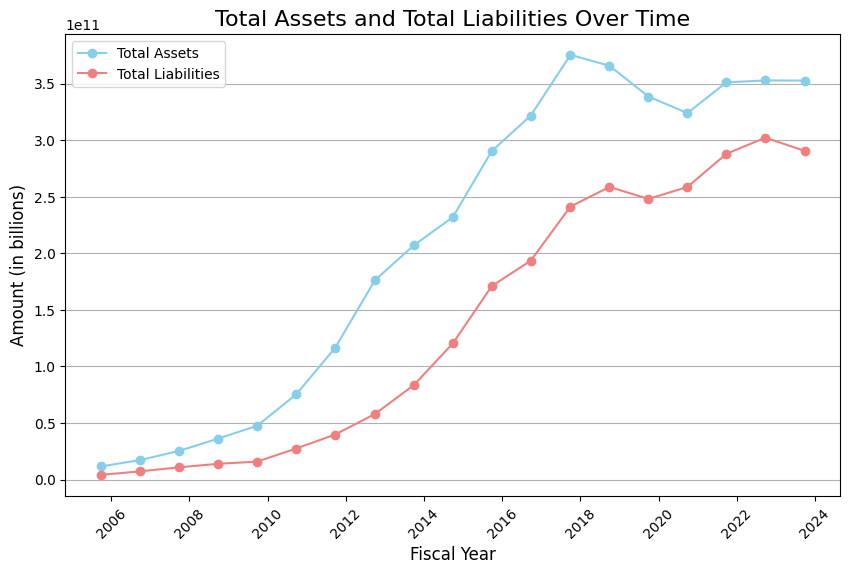

In [9]:
#Vẽ biểu đồ đường cho Tổng Tài Sản và Tổng Nợ
plt.figure(figsize=(10, 6))
plt.plot(total_assets_int.index, total_assets_int.values, marker='o', color='skyblue', label='Total Assets')
plt.plot(total_liabilities_int.index, total_liabilities_int.values, marker='o', color='lightcoral', label='Total Liabilities')
plt.title('Total Assets and Total Liabilities Over Time', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Amount (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()

# **Tình hình tài chính ngắn hạn của công ty có khả năng thanh toán tốt không?**

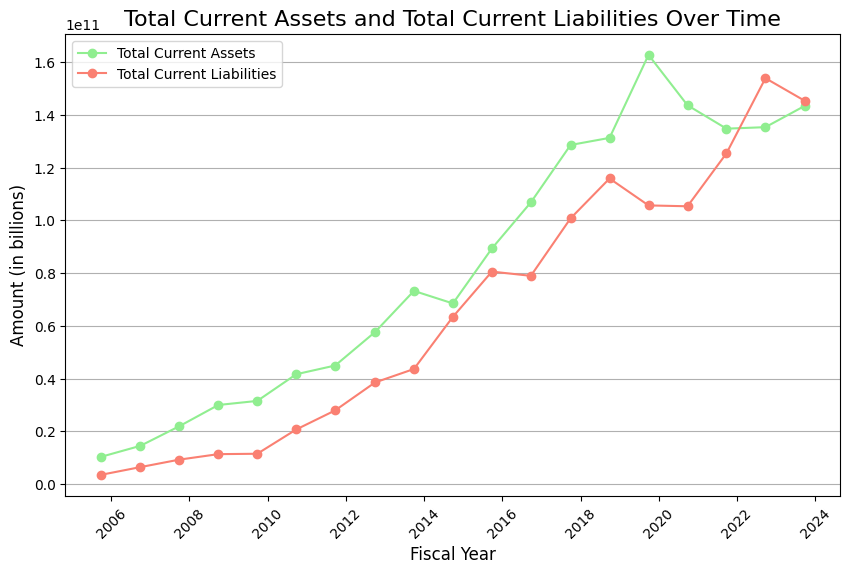

In [10]:
#Vẽ biểu đồ đường cho Tổng Tài Sản Ngắn Hạn và Tổng Nợ Ngắn Hạn
plt.figure(figsize=(10, 6))
plt.plot(total_current_assets_int.index, total_current_assets_int.values, marker='o', color='lightgreen', label='Total Current Assets')
plt.plot(total_current_liabilities_int.index, total_current_liabilities_int.values, marker='o', color='salmon', label='Total Current Liabilities')
plt.title('Total Current Assets and Total Current Liabilities Over Time', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Amount (in billions)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()